### Import SUM shit

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
# Standard data visualisaton params for Jupyter
%matplotlib inline
rcParams['figure.figsize'] = 15, 4
sb.set_style('whitegrid')

### Getting dataset

In [3]:
address = '../datasets/staandelamp_realistic.json'
df_data = pd.read_json(address)


### TEMP ###
df_data = df_data[:100]
### TEMP ###


df_data[:5]

,name,state,time
0,Staande_Lamp_1,1,1509491943009
1,Staande_Lamp_2,0,1509492221471
2,Staande_Lamp_3,0,1509489940655
3,Staande_Lamp_3,1,1509492826941
4,Staande_Lamp_3,1,1509492860451


### reformat the first column to iterables to prevent the following error when building the DBSCAN model:
ValueError: could not convert string to float: 'Staande_Lamp_5'

In [4]:
# THIS WORKS TOO: (but you end up with a numpy array instead of the pandas dataframe)

# from sklearn.preprocessing import LabelEncoder
# encode = LabelEncoder()
# arr = df.values
# 
# column = 0;
# arr[:,column] = encode.fit_transform(arr[:,column])

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

print('before:\n', df_data.head())

d = defaultdict(LabelEncoder)
df_fit = df_data.apply(lambda x: d[x.name].fit_transform(x))
df_fit['time'] = df_data['time']
print('after:\n', df_fit.head())

before:
              name  state           time
0  Staande_Lamp_1      1  1509491943009
1  Staande_Lamp_2      0  1509492221471
2  Staande_Lamp_3      0  1509489940655
3  Staande_Lamp_3      1  1509492826941
4  Staande_Lamp_3      1  1509492860451
after:
    name  state           time
0     0      1  1509491943009
1     1      0  1509492221471
2     2      0  1509489940655
3     2      1  1509492826941
4     2      1  1509492860451


### Clustering
##### 300000ms = 5 minutes

In [5]:
model = DBSCAN(eps=300000, min_samples=2).fit(df_fit)
print(model)

DBSCAN(algorithm='auto', eps=300000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)


# Visualize results

In [6]:
df_outliers = pd.DataFrame(df_fit)
print(Counter(model.labels_))
print('amount of data:', df_fit.shape[0])
print('amount of outliers:', df_outliers[model.labels_==-1].shape[0])
print('\nsome of the outliers:\n', df_outliers[model.labels_==-1].head())

Counter({-1: 32, 2: 5, 22: 5, 6: 4, 10: 4, 7: 3, 11: 3, 13: 3, 18: 3, 19: 3, 24: 3, 0: 2, 1: 2, 3: 2, 4: 2, 5: 2, 8: 2, 9: 2, 12: 2, 14: 2, 15: 2, 16: 2, 17: 2, 20: 2, 21: 2, 23: 2, 25: 2})
amount of data: 100
amount of outliers: 32

some of the outliers:
     name  state           time
11     2      0  1509496790877
12     3      0  1509494311740
13     4      1  1509495178373
17     2      1  1509500655859
18     2      0  1509499036484


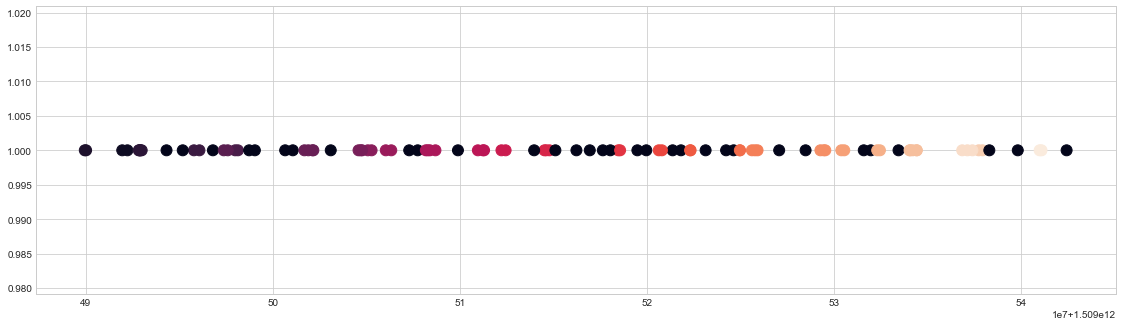

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_

# use first column as X value
X = df_fit.iloc[:,2]
# set nr 1 as the value for y so it will be 1Dimentional
Y = [1] * df_fit.shape[0]

ax.scatter(X, Y, c=colors, s=120)
ax.set_xlabel = 'time'
plt.title = 'Groupingz'